In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy import stats
from scripts.seed_corr import import_ts, correlate_ts, get_conn, get_data, select_regions
import pingouin as pg
from copy import deepcopy


base_dir = '/Users/callithrix/Documents/Projects/Degeneaveragen/derivatives/'


In [79]:
data = pd.read_csv('../data/fix_loo_performance.csv')
data['threshold'] = data['threshold'].astype(str) # Make thresholds strings to make plotting easier
data.head()

,subject,space,age,sex,group,condition,rate,metric,threshold
0,sub-01,DeCon,66,m,p,PropFB,57.9,TNR,1
1,sub-01,mni,66,m,p,PropFB,0.0,TNR,1
2,sub-10,DeCon,70,m,p,PropFB,14.0,TNR,1
3,sub-10,mni,70,m,p,PropFB,7.7,TNR,1
4,sub-11,DeCon,58,m,p,Prop,50.0,TNR,1


# Plot FIX leave-one-out performance

<Figure size 1000x1000 with 0 Axes>

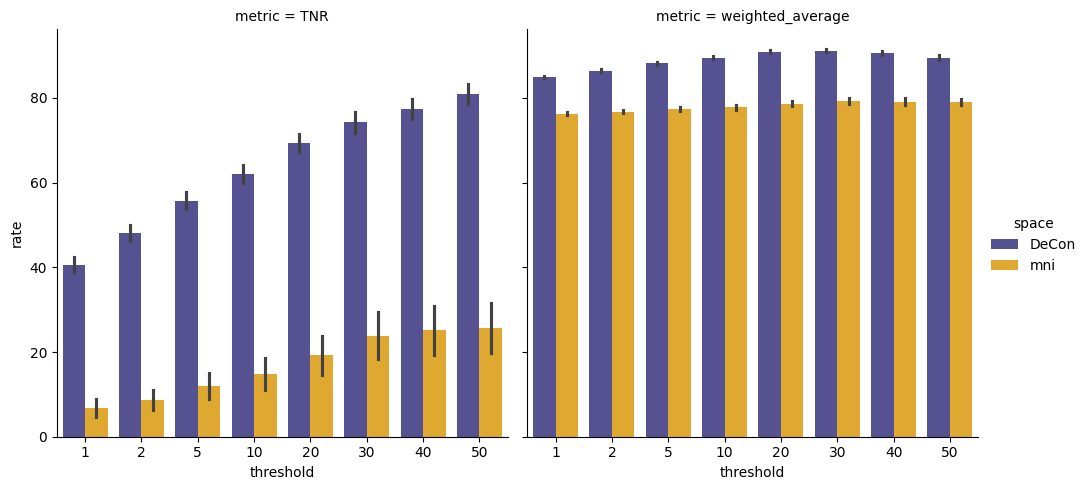

In [80]:
# make colours to correspond to DeCon and MNI templates
hex_codes = ['#4D489C', '#FCB414']
# convert hex to matplotlib format
custom_palette = sns.color_palette(hex_codes)


plt.figure(figsize=(10, 10))
sns.catplot(data=data, x="threshold", y="rate", col="metric",
            hue="space", kind="bar", errorbar="se", palette=custom_palette)


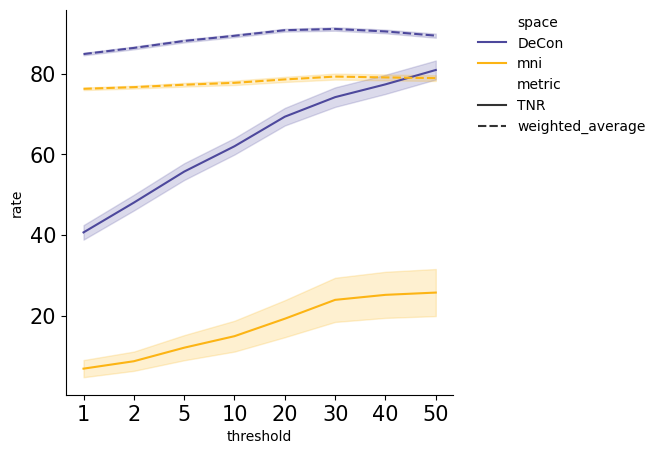

In [81]:
plt.figure(figsize=(5, 5))
sns.lineplot(data=data, x="threshold", y="rate",
             hue="space", errorbar="se", style="metric", palette=custom_palette)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0, frameon=False)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.gcf().set_size_inches(5, 5)
# Remove line around figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#
#Save figure
# plt.savefig('fix_loo_performance.png', bbox_inches='tight', dpi=600)



## Test for difference in noise classification between MNI-based noise classification and DeCon-based noise classification

In [82]:
degen = data.query('space == "DeCon" & metric == "TNR"')[['subject', 'rate']].groupby('subject').mean().rate
mni = data.query('space == "mni" & metric == "TNR"')[['subject', 'rate']].groupby('subject').mean().rate

performance = degen.mean() - mni.mean()
print(
    f'Increase in performance: {round(performance)}% (from {round(mni.mean(),2)} to {round(degen.mean(),2)})')

result = stats.ttest_rel(degen, mni)
df=len(degen)-1
print(f'p-value: {result.pvalue:.2e} (t({df})={round(result.statistic,2)})')

Increase in performance: 46% (from 17.18 to 63.58)
p-value: 4.54e-13 (t(40)=10.51)


In [83]:
degen = data.query('space == "DeCon" & metric == "TNR" & threshold == "30"').rate
mni = data.query('space == "mni" & metric == "TNR" & threshold == "30"').rate

performance = degen.mean() - mni.mean()
print(
    f'Increase in performance: {round(performance)}% (from {round(mni.mean(),2)} to {round(degen.mean(),2)})')

result = stats.ttest_rel(degen, mni)
df=len(degen)-1
print(f'p-value: {result.pvalue} (t({df})={result.statistic})')

Increase in performance: 50% (from 23.89 to 74.23)
p-value: 1.0099682775603543e-10 (t(42)=8.536848570288436)


## Threshold was chosen according to maximum weighted average of TPR & TNR
Weighted average was highest at threshold = 30

In [84]:
summary = data[['space', 'metric', 'threshold', 'rate']].groupby(['space', 'metric', 'threshold']).mean()
# Find highest value of weighted_average
summary.loc['DeCon', 'weighted_average']

,rate
threshold,
1,84.929070
10,89.469186
2,86.450581
20,90.855814
30,91.159884
40,90.544767
5,88.182558
50,89.498256
